# Librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import random

In [2]:
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom
from keras.models import Sequential
from keras import layers

# Datasets

[Kaggle: Fruit Images for Object Detection](https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection)

## Train & validation datasets

In [3]:
train_imgs = []       
train_labels = []
shape = (200,200)  
train_path = '/content/drive/MyDrive/Escuela/ITESM IDM/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos II/Módulo 2/Momento Retroalimentación Deep Learning/Fruits/train/'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_imgs.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_imgs)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

print(x_train.shape)

(180, 200, 200, 3)


## Test dataset

In [4]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/Escuela/ITESM IDM/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos II/Módulo 2/Momento Retroalimentación Deep Learning/Fruits/test/'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

test_labels_dum = pd.get_dummies(test_labels).values

[0 0 0 1]


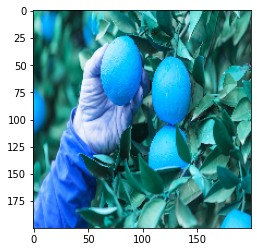

In [5]:
index = random.randint(0,x_train.shape[0])
print(train_labels[index])
plt.imshow(train_images[index])

# Modelos

## Primer Modelo: Red Densa



*   2 Capas Densas



In [6]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(200,200,3,)))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(4, activation='softmax'))


model1.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 100)               12000100  
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 12,000,504
Trainable params: 12,000,504
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = model1.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 3s 71ms/step - loss: 22843.0469 - acc: 0.2667 - val_loss: 34135.2227 - val_acc: 0.3833
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 27594.4590 - acc: 0.3722 - val_loss: 17597.0938 - val_acc: 0.3000
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 18983.5820 - acc: 0.3000 - val_loss: 2967.7896 - val_acc: 0.4667
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 4115.5044 - acc: 0.4667 - val_loss: 3679.4470 - val_acc: 0.4500
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 2899.7422 - acc: 0.5111 - val_loss: 966.4061 - val_acc: 0.4500
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 1293.6836 - acc: 0.4222 - val_loss: 267.9820 - val_acc: 0.6167
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 214.5203 - acc: 0.6000 - val_loss: 239.2767 - val_acc: 0.4833
Epoch 8/50
4/4 [==============================] - 0s 2

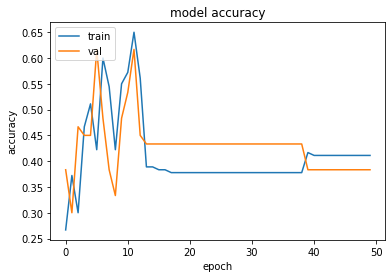

In [8]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

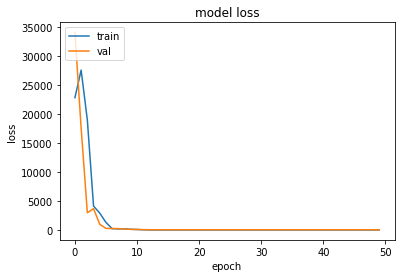

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
evaluate1 = model1.evaluate(x_val,y_val)
print(evaluate1)

2/2 [==============================] - 0s 8ms/step - loss: 29.7096 - acc: 0.3833
[29.709636688232422, 0.38333332538604736]


In [11]:
evaluate1 = model1.evaluate(test_images, test_labels_dum)
print(evaluate1)

2/2 [==============================] - 0s 8ms/step - loss: 1.1911 - acc: 0.4333
[1.1910537481307983, 0.4333333373069763]


In [12]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict1 = model1.predict(np.array(checkImage))
print(predict1)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict1)])


1/1 [==============================] - 0s 69ms/step
[[0.24776492 0.2660674  0.2226649  0.26350275]]
Actual :-  ['orange']
Predicted :-  banana


## Segindo Modelo: Red Convolutiva I

*   1 Capa Convolutiva
*   1 Capa Pooling
*   1 Capa Densa





In [13]:
model2= Sequential()
model2.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dense(4,activation = 'softmax'))
    
model2.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 313632)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1254532   
                                                                 
Total params: 1,255,428
Trainable params: 1,255,428
Non-trainable params: 0
_________________________________________________________________


In [14]:
history2 = model2.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 7s 144ms/step - loss: 150.9868 - acc: 0.3500 - val_loss: 206.2069 - val_acc: 0.0667
Epoch 2/50
4/4 [==============================] - 0s 36ms/step - loss: 93.3363 - acc: 0.2889 - val_loss: 78.8252 - val_acc: 0.4000
Epoch 3/50
4/4 [==============================] - 0s 36ms/step - loss: 58.6154 - acc: 0.5889 - val_loss: 37.6893 - val_acc: 0.6833
Epoch 4/50
4/4 [==============================] - 0s 37ms/step - loss: 42.6297 - acc: 0.7111 - val_loss: 12.3653 - val_acc: 0.8000
Epoch 5/50
4/4 [==============================] - 0s 37ms/step - loss: 9.4351 - acc: 0.7667 - val_loss: 14.0733 - val_acc: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 35ms/step - loss: 4.2170 - acc: 0.8611 - val_loss: 10.5145 - val_acc: 0.7667
Epoch 7/50
4/4 [==============================] - 0s 38ms/step - loss: 4.7595 - acc: 0.8722 - val_loss: 7.6726 - val_acc: 0.8000
Epoch 8/50
4/4 [==============================] - 0s 38ms/step - loss: 1.2839 - acc:

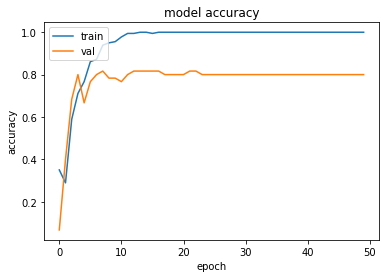

In [15]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

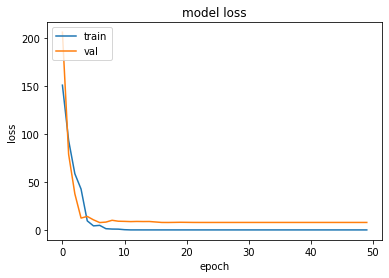

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
evaluate2 = model2.evaluate(x_val,y_val)
print(evaluate2)

2/2 [==============================] - 0s 82ms/step - loss: 7.7980 - acc: 0.8000
[7.797994136810303, 0.800000011920929]


In [18]:
evaluate2 = model2.evaluate(test_images, test_labels_dum)
print(evaluate2)

2/2 [==============================] - 0s 15ms/step - loss: 9.7846 - acc: 0.8333
[9.784585952758789, 0.8333333134651184]


In [19]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict2 = model2.predict(np.array(checkImage))
print(predict2)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict2)])


1/1 [==============================] - 0s 69ms/step
[[1. 0. 0. 0.]]
Actual :-  ['apple']
Predicted :-  apple


## Tercer Modelo: Red Convolutiva II

*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas

In [20]:
model3= Sequential()
model3.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model3.add(Flatten())

model3.add(Dense(20,activation='relu'))
model3.add(Dense(15,activation='relu'))
model3.add(Dense(4,activation = 'softmax'))
    
model3.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 30)       

In [21]:
history3 = model3.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 3s 453ms/step - loss: 5.5010 - acc: 0.2278 - val_loss: 1.9269 - val_acc: 0.4167
Epoch 2/50
4/4 [==============================] - 0s 97ms/step - loss: 1.4638 - acc: 0.4778 - val_loss: 1.2221 - val_acc: 0.5167
Epoch 3/50
4/4 [==============================] - 0s 96ms/step - loss: 1.0666 - acc: 0.5667 - val_loss: 1.0969 - val_acc: 0.6333
Epoch 4/50
4/4 [==============================] - 0s 97ms/step - loss: 0.9577 - acc: 0.5944 - val_loss: 0.7771 - val_acc: 0.7000
Epoch 5/50
4/4 [==============================] - 0s 99ms/step - loss: 0.6232 - acc: 0.7000 - val_loss: 0.5396 - val_acc: 0.8333
Epoch 6/50
4/4 [==============================] - 0s 98ms/step - loss: 0.4283 - acc: 0.8333 - val_loss: 0.4733 - val_acc: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 99ms/step - loss: 0.2277 - acc: 0.9556 - val_loss: 0.5335 - val_acc: 0.7833
Epoch 8/50
4/4 [==============================] - 0s 106ms/step - loss: 0.1682 - acc: 0.9556 - v

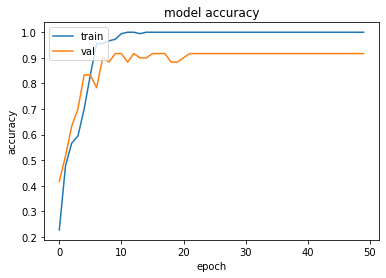

In [22]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

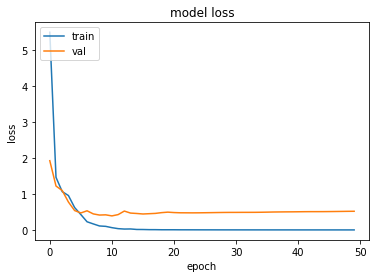

In [23]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
evaluate3 = model3.evaluate(x_val,y_val)
print(evaluate3)

2/2 [==============================] - 1s 246ms/step - loss: 0.5200 - acc: 0.9167
[0.5200316309928894, 0.9166666865348816]


In [25]:
evaluate3 = model3.evaluate(test_images, test_labels_dum)
print(evaluate3)

2/2 [==============================] - 0s 20ms/step - loss: 0.8431 - acc: 0.8333
[0.8431158661842346, 0.8333333134651184]


In [26]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict3 = model3.predict(np.array(checkImage))
print(predict3)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict3)])


1/1 [==============================] - 0s 137ms/step
[[6.4451742e-06 2.3137907e-06 1.5366996e-02 9.8462415e-01]]
Actual :-  ['orange']
Predicted :-  orange


## Cuarto Modelo: Red Convolutiva II c/ Batch Normalization

*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas
*   3 Capas BatchNormalization

In [27]:
model4= Sequential()
model4.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(2,2))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(2,2))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())

model4.add(Flatten())

model4.add(Dense(20,activation='relu'))
model4.add(Dense(15,activation='relu'))
model4.add(Dense(4,activation = 'softmax'))
    
model4.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 batch_normalization (BatchN  (None, 196, 196, 30)     120       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 30)      

In [28]:
history4 = model4.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 1s 174ms/step - loss: 1.9742 - acc: 0.4722 - val_loss: 1.2493 - val_acc: 0.3833
Epoch 2/50
4/4 [==============================] - 0s 111ms/step - loss: 1.1551 - acc: 0.7167 - val_loss: 1.6934 - val_acc: 0.3833
Epoch 3/50
4/4 [==============================] - 0s 112ms/step - loss: 0.8211 - acc: 0.7778 - val_loss: 2.0213 - val_acc: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 116ms/step - loss: 0.6805 - acc: 0.8667 - val_loss: 3.0563 - val_acc: 0.2667
Epoch 5/50
4/4 [==============================] - 0s 111ms/step - loss: 0.2382 - acc: 0.9222 - val_loss: 2.7228 - val_acc: 0.3167
Epoch 6/50
4/4 [==============================] - 0s 116ms/step - loss: 0.1825 - acc: 0.9389 - val_loss: 2.6937 - val_acc: 0.4000
Epoch 7/50
4/4 [==============================] - 0s 119ms/step - loss: 0.1647 - acc: 0.9556 - val_loss: 2.9793 - val_acc: 0.3667
Epoch 8/50
4/4 [==============================] - 0s 124ms/step - loss: 0.0986 - acc: 0.96

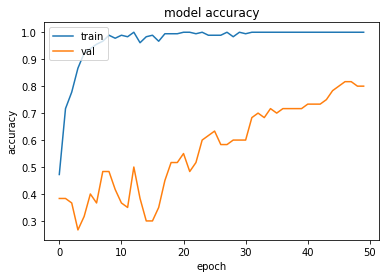

In [29]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

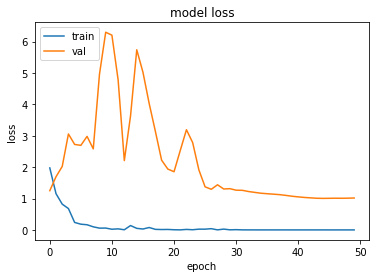

In [30]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
evaluate4 = model4.evaluate(x_val,y_val)
print(evaluate4)

2/2 [==============================] - 0s 24ms/step - loss: 1.0168 - acc: 0.8000
[1.0167962312698364, 0.800000011920929]


In [32]:
evaluate4 = model4.evaluate(test_images, test_labels_dum)
print(evaluate4)

2/2 [==============================] - 0s 27ms/step - loss: 1.4210 - acc: 0.8167
[1.4209548234939575, 0.8166666626930237]


In [33]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict4 = model4.predict(np.array(checkImage))
print(predict4)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict4)])


1/1 [==============================] - 0s 137ms/step
[[4.8484592e-04 9.9493992e-01 4.5514107e-03 2.3847193e-05]]
Actual :-  ['mixed']
Predicted :-  banana


## Quinto Modelo: Red Convolutiva II c/ B.N. & Data Augmentation

*   1 Capa RandomFlip
*   1 Capa RandomRotation
*   1 Capa RandomZoom
*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas
*   3 Capas BatchNormalization

In [34]:
model5= Sequential()
model5.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model5.add(RandomFlip("horizontal"))
model5.add(RandomRotation(0.1))
model5.add(RandomZoom(0.2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())

model5.add(Flatten())

model5.add(Dense(20,activation='relu'))
model5.add(Dense(15,activation='relu'))
model5.add(Dense(4,activation = 'softmax'))
    
model5.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 random_flip (RandomFlip)    (None, 198, 198, 32)      0         
                                                                 
 random_rotation (RandomRota  (None, 198, 198, 32)     0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 198, 198, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 batch_normalization_3 (Batc  (None, 196, 196, 30)     120       
 hNormalization)                                      

In [35]:
history5 = model5.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 5s 256ms/step - loss: 2.0745 - acc: 0.4944 - val_loss: 4.9339 - val_acc: 0.1000
Epoch 2/50
4/4 [==============================] - 1s 176ms/step - loss: 1.4926 - acc: 0.7167 - val_loss: 3.7934 - val_acc: 0.3667
Epoch 3/50
4/4 [==============================] - 1s 182ms/step - loss: 0.7968 - acc: 0.8389 - val_loss: 3.4154 - val_acc: 0.4333
Epoch 4/50
4/4 [==============================] - 1s 178ms/step - loss: 0.7015 - acc: 0.8333 - val_loss: 2.9946 - val_acc: 0.4333
Epoch 5/50
4/4 [==============================] - 1s 175ms/step - loss: 0.4816 - acc: 0.8278 - val_loss: 1.1199 - val_acc: 0.7500
Epoch 6/50
4/4 [==============================] - 1s 176ms/step - loss: 0.5415 - acc: 0.8444 - val_loss: 1.2114 - val_acc: 0.8000
Epoch 7/50
4/4 [==============================] - 1s 183ms/step - loss: 0.6072 - acc: 0.8833 - val_loss: 0.8389 - val_acc: 0.8167
Epoch 8/50
4/4 [==============================] - 1s 173ms/step - loss: 0.6832 - acc: 0.85

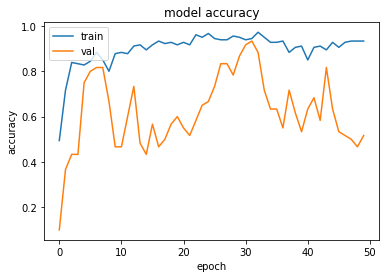

In [36]:
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

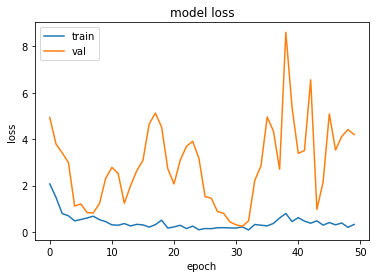

In [37]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
evaluate5 = model5.evaluate(x_val,y_val)
print(evaluate5)

2/2 [==============================] - 0s 23ms/step - loss: 4.2037 - acc: 0.5167
[4.203728675842285, 0.5166666507720947]


In [39]:
evaluate5 = model5.evaluate(test_images, test_labels_dum)
print(evaluate5)

2/2 [==============================] - 0s 24ms/step - loss: 3.4035 - acc: 0.5667
[3.403501272201538, 0.5666666626930237]


In [53]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

print(checkImage.shape)

predict5 = model5.predict(np.array(checkImage))
print(predict5)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict5)])


(1, 200, 200, 3)
1/1 [==============================] - 0s 26ms/step
[[1.2861340e-19 9.9993002e-01 4.0166244e-05 2.9777993e-05]]
Actual :-  ['banana']
Predicted :-  banana


# Comparación Final



---
**1er Modelo:** Validtion Accuracy: 75% | Test Accuracy: 75% | Prediction Test: Failed | Conclusión: Una red densa no es suficiente


---
**2do Modelo:** Validtion Accuracy: 85% | Test Accuracy: 78% | Prediction Test: Failed | Conclusion: Una arquitectura más profunda puede ayudar


---
**3er Modelo:** Validtion Accuracy: 92% | Test Accuracy: 82% | Prediction Test: Passed | Conclusión: *Mejor modelo*


---
**4to Modelo:** Validtion Accuracy: 78% | Test Accuracy: 83% | Prediction Test: Passed | Conclusión: No es necesario agregar batch normalization


---
**5to Modelo:** Validtion Accuracy: 67% | Test Accuracy: 73% | Prediction Test: Failed | Conclusión: Demasiadas tecnicas


---








Trabajo a futuro: 
Implementar un callback con early stopping para evitar el overfitting en el training accuracy

# Correciones tras retroalimentación

Tomamos el 3er Modelo para agregar Early Stopping

In [88]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 46, 46, 30)       

In [89]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val), callbacks=[early_stopping_cb])

Epoch 1/50
4/4 [==============================] - 1s 175ms/step - loss: 3.4520 - acc: 0.3000 - val_loss: 1.4300 - val_acc: 0.4667
Epoch 2/50
4/4 [==============================] - 0s 98ms/step - loss: 2.0454 - acc: 0.3500 - val_loss: 2.4301 - val_acc: 0.4167
Epoch 3/50
4/4 [==============================] - 0s 106ms/step - loss: 2.7843 - acc: 0.2944 - val_loss: 2.5235 - val_acc: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 100ms/step - loss: 1.6076 - acc: 0.4111 - val_loss: 1.6108 - val_acc: 0.3667
Epoch 5/50
4/4 [==============================] - 0s 101ms/step - loss: 1.1768 - acc: 0.5056 - val_loss: 0.6727 - val_acc: 0.7333
Epoch 6/50
4/4 [==============================] - 0s 98ms/step - loss: 0.7374 - acc: 0.6944 - val_loss: 0.9312 - val_acc: 0.5833
Epoch 7/50
4/4 [==============================] - 0s 101ms/step - loss: 0.7055 - acc: 0.7000 - val_loss: 0.5295 - val_acc: 0.8167
Epoch 8/50
4/4 [==============================] - 0s 106ms/step - loss: 0.5327 - acc: 0.7722

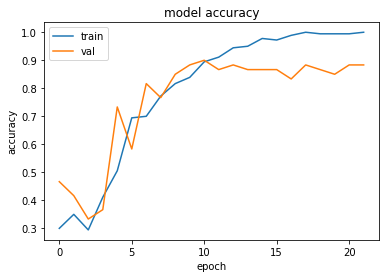

In [90]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

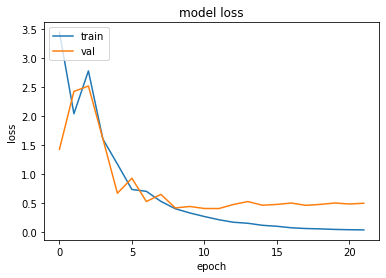

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [92]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 0s 22ms/step - loss: 0.4083 - acc: 0.8667
[0.40826213359832764, 0.8666666746139526]


In [93]:
evaluate = model.evaluate(test_images, test_labels_dum)
print(evaluate)

2/2 [==============================] - 0s 22ms/step - loss: 1.3283 - acc: 0.7667
[1.328339695930481, 0.7666666507720947]


In [98]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict = model.predict(np.array(checkImage))
print(predict)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])


1/1 [==============================] - 0s 17ms/step
[[9.99998569e-01 1.32528669e-06 3.84932447e-10 1.04796584e-07]]
Actual :-  ['apple']
Predicted :-  apple


## Método para probar el modelo

In [95]:
image = "chop-banana.jpg"

In [96]:
def test_model(model,image):

  shape = (200,200)
  img = cv2.imread(image)
  img = cv2.resize(img,shape)
  plt.imshow(img)
  img = np.reshape(img, (1,200,200,3))

  prediction = model.predict(np.array(img))
  print(prediction)
  
  output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}
  #print("Predicted : ")

  return (output[np.argmax(prediction)])

1/1 [==============================] - 0s 20ms/step
[[9.6167480e-07 9.9999607e-01 3.3276231e-07 2.6082062e-06]]


'banana'

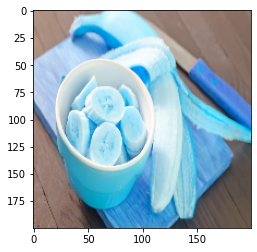

In [97]:
test_model(model3, image)